## DATASTORY 1: THE QUANTITY OF VIETNAM COFFEE BEANS EXPORTING TO EU

This dataset is downloaded from the Eustat via this link: https://ec.europa.eu/eurostat/databrowser/view/ds-045409__custom_12942991/default/table?lang=en

Eurostat dataset is intended to track imports and exports across EU countries, providing insights into trade flows, including coffee imports from non-EU countries like Vietnam. This dataset includes variables such as trade volume, value, country of origin,
and specific product categories imported into the EU regarding to coffee exports. It compares data detailing the value and quantity imported from Vietnam, capturing the shifts in EU demand for Vietnamese coffee during the period of 2013 - 2023.

### Step 1: Import dataframe about Coffee beans importing to EU and clean the database

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
#There is a mismatch between the column names and the values so I have to fix this
eu = pd.read_csv('eu.csv')
eu= eu.drop(columns=['OBS_VALUE'])
eu.columns=['LAST UPDATE','freq','reporter','partner','product','flow','indicators','TIME_PERIOD','OBS_VALUE']
eu.head()

,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,AD,090111,1,QUANTITY_IN_100KG,2023,191.75
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,AD,090121,1,QUANTITY_IN_100KG,2023,0.77
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,AD,TOTAL,1,QUANTITY_IN_100KG,2013,1767386.87
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,AD,TOTAL,1,QUANTITY_IN_100KG,2023,3510197.37
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,AE,090111,1,QUANTITY_IN_100KG,2013,5.28


In [18]:
eu.describe()

,flow,TIME_PERIOD,OBS_VALUE
count,1724.0,1724.000000,1.724000e+03
mean,1.0,2018.568445,7.118636e+07
std,0.0,4.969023,7.665795e+08
min,1.0,2013.000000,0.000000e+00
25%,1.0,2013.000000,1.390000e+00
50%,1.0,2023.000000,2.584450e+02
75%,1.0,2023.000000,1.297218e+05
max,1.0,2023.000000,1.598843e+10


In [19]:
eu.dtypes

LAST UPDATE     object
freq            object
reporter        object
partner         object
product         object
flow             int64
indicators      object
TIME_PERIOD      int64
OBS_VALUE      float64
dtype: object

In [20]:
#Filter the data from Vietnam
vietnam=eu[eu['partner'] == 'VN']
vietnam.head()

,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090111,1,QUANTITY_IN_100KG,2013,6203778.64
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090111,1,QUANTITY_IN_100KG,2023,6333572.92
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090112,1,QUANTITY_IN_100KG,2013,43577.71
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090112,1,QUANTITY_IN_100KG,2023,188917.56
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090121,1,QUANTITY_IN_100KG,2013,697.66


In [21]:
#Remove the total value of the product
vietnam = vietnam[vietnam['product'] != 'TOTAL']

In [22]:
#List out the product
product_types=vietnam['product'].unique()
product_types

array(['090111', '090112', '090121', '090122', '09019010', '09019090'],
      dtype=object)

In [23]:
#Extract data of 2013 and 2023
data_2013=vietnam[vietnam['TIME_PERIOD']==2013]

In [24]:
data_2023=vietnam[vietnam['TIME_PERIOD']==2023]

In [25]:
data_2013

,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090111,1,QUANTITY_IN_100KG,2013,6203778.64
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090112,1,QUANTITY_IN_100KG,2013,43577.71
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090121,1,QUANTITY_IN_100KG,2013,697.66
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090122,1,QUANTITY_IN_100KG,2013,14.28
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,09019010,1,QUANTITY_IN_100KG,2013,0.03
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,09019090,1,QUANTITY_IN_100KG,2013,379.92


In [26]:
data_2023

,LAST UPDATE,freq,reporter,partner,product,flow,indicators,TIME_PERIOD,OBS_VALUE
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090111,1,QUANTITY_IN_100KG,2023,6333572.92
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090112,1,QUANTITY_IN_100KG,2023,188917.56
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090121,1,QUANTITY_IN_100KG,2023,3047.39
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,090122,1,QUANTITY_IN_100KG,2023,111.98
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,09019010,1,QUANTITY_IN_100KG,2023,169.18
ESTAT:DS-045409(1.0),18/11/24 11:00:00,A,EU27_2020,VN,09019090,1,QUANTITY_IN_100KG,2023,210.16


### Step 2: Comparing amount of different coffee types imported to EU from Vietnam

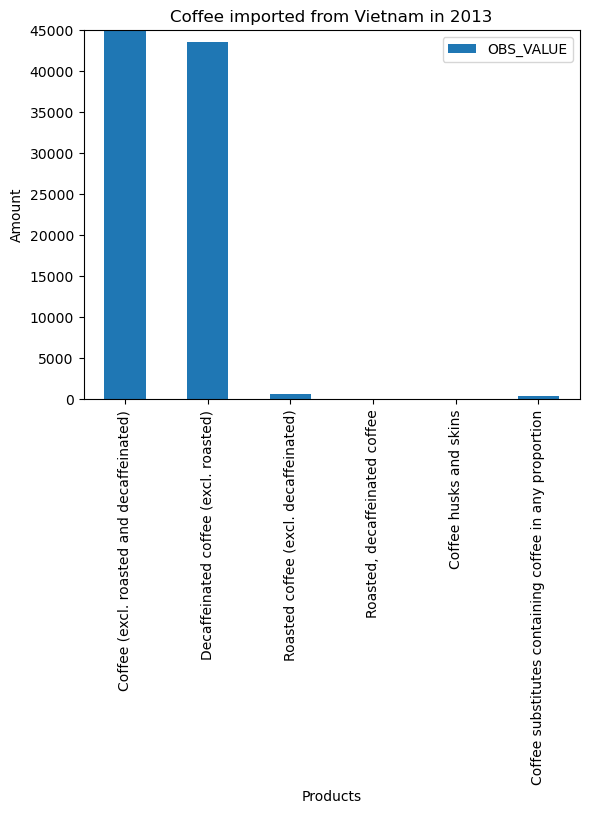

In [27]:
#Plot a bar graph for 2013 data
data_2013.plot(x='product', y='OBS_VALUE',kind='bar')
plt.xticks(ticks=[0,1,2,3,4,5], 
           labels=['Coffee (excl. roasted and decaffeinated)',
                   'Decaffeinated coffee (excl. roasted)',
                   'Roasted coffee (excl. decaffeinated)',
                   'Roasted, decaffeinated coffee',
                   'Coffee husks and skins',
                   'Coffee substitutes containing coffee in any proportion'])
plt.title('Coffee imported from Vietnam in 2013')
plt.xlabel('Products')
#plt.yscale('log')
plt.ylim(0,45000)
plt.ylabel('Amount')
plt.show()
#Limitation: The Coffee (excl. roasted and decaffeinated) value is way too exceeded in comparision with other types of coffee

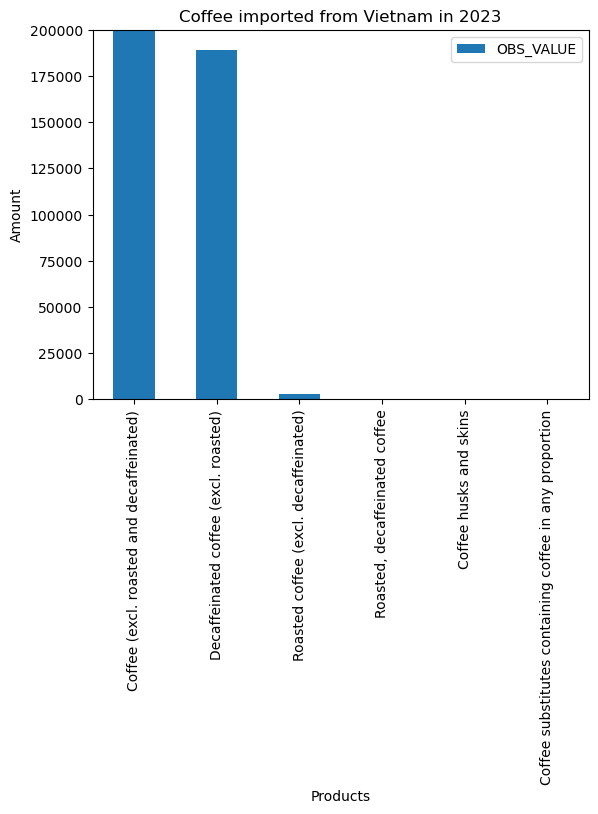

In [28]:
#Plot a bar graph for 2023 data
data_2023.plot(x='product', y='OBS_VALUE',kind='bar')
plt.xticks(ticks=[0,1,2,3,4,5], 
           labels=['Coffee (excl. roasted and decaffeinated)',
                   'Decaffeinated coffee (excl. roasted)',
                   'Roasted coffee (excl. decaffeinated)',
                   'Roasted, decaffeinated coffee',
                   'Coffee husks and skins',
                   'Coffee substitutes containing coffee in any proportion'])
plt.title('Coffee imported from Vietnam in 2023')
plt.xlabel('Products')
#plt.yscale('log')
plt.ylim(0,200000)
plt.ylabel('Amount')
plt.show()
#Limitation: The Coffee (excl. roasted and decaffeinated) value is way too exceeded in comparision with other types of coffee

### Step 3: Create interactive data visualization

In [29]:
!pip install cairosvg

In [30]:
!pip install pygal

In [31]:
# I choose to import the pygal visualization package create standard charts with hover-effects
import pygal

In [32]:
# Create an interactive bar chart in log scale for y_scale with equal legend for data_2013 and data_2023 using pygal 

import pygal
from pygal.style import Style

# Create a custom style for the chart
custom_style = Style(
    background='transparent',
    plot_background='transparent',
    foreground='#000000',
    foreground_strong='#000000',
    foreground_subtle='#666666',
    opacity='.6',
    opacity_hover='.9',
    transition='400ms ease-in',
    colors=('#4A90E2', '#9013FE'),
    legend_box_fill='lightblue',
    font_family='Jonsefin Sans, sans-serif', 
    label_font_size=6, 
    major_label_font_size=12, 
    title_font_size=16)

# Create the bar chart with a logarithmic scale
bar_chart = pygal.Bar(logarithmic=True, 
                      style=custom_style, 
                      x_label_rotation=30, 
                      y_title='Value (in 100KG)',
                      legend_at_bottom=True, 
                      show_y_guides=True,
                      width=1000,
                      height=500,
                      bar_width=5, 
                      y_labels = [1,10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000])
bar_chart.title = 'Coffee imported from Vietnam in 2013 and 2023'
x_labels = ['Coffee (excl. roasted and decaffeinated)',
            'Decaffeinated coffee (excl. roasted)',
            'Roasted coffee (excl. decaffeinated)',
            'Roasted, decaffeinated coffee',
            'Coffee husks and skins',
            'Coffee substitutes containing coffee in any proportion']

bar_chart.x_labels = x_labels

bar_chart.add('2013', data_2013['OBS_VALUE'].values.tolist())
bar_chart.add('2023', data_2023['OBS_VALUE'].values.tolist())

# Set the y-axis scale
bar_chart.y_scale = [0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

# Render the chart to an SVG file
bar_chart.render_to_file('bar_chart.svg')

# Display the chart in the notebook (may not work in all environments)
bar_chart.render_in_browser()

file:///var/folders/8b/9w1c96dn4c3cclbb5d1t6h840000gn/T/tmpsbxaj4vi.html
